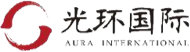

### 替换操作
- 替换操作可以同步作用于Series和DataFrame中
- 单值替换
    - 普通替换：  替换所有符合要求的元素:to_replace=15,value='e'
    - 按列指定单值替换： to_replace={列标签：替换值} value='value'
    
    
- 多值替换
    - 列表替换: to_replace=[]  value=[]
    - 字典替换（推荐）  to_replace={to_replace:value,to_replace:value}

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame

In [2]:
df = DataFrame(data=np.random.randint(0,10,size=(5,6)))
df

,0,1,2,3,4,5
0,5,1,6,6,3,6
1,5,9,8,1,7,4
2,7,8,3,0,0,9
3,5,8,7,3,7,3
4,9,8,9,3,3,2


In [3]:
#全局的单值替换
df.replace(to_replace=3,value='three')

,0,1,2,3,4,5
0,5,1,6,6,three,6
1,5,9,8,1,7,4
2,7,8,three,0,0,9
3,5,8,7,three,7,three
4,9,8,9,three,three,2


In [5]:
#全局的多值替换
df.replace(to_replace={1:'one',5:'five'})

,0,1,2,3,4,5
0,five,one,6,6,3,6
1,five,9,8,one,7,4
2,7,8,3,0,0,9
3,five,8,7,3,7,3
4,9,8,9,3,3,2


In [7]:
#指定列的元素替换
df.replace(to_replace={3:6},value='six')

,0,1,2,3,4,5
0,5,1,6,six,3,6
1,5,9,8,1,7,4
2,7,8,3,0,0,9
3,5,8,7,3,7,3
4,9,8,9,3,3,2


### 映射操作（重要！！！）
- 概念：创建一个映射关系列表，把values元素和一个特定的标签或者字符串绑定（给一个元素值提供不同的表现形式）

创建一个df，两列分别是姓名和薪资，然后给其名字起对应的英文名

In [8]:
dic = {
    'name':['张三','李四','王五','张三'],
    'salary':[10000,15000,21000,10000]
}
df = DataFrame(data=dic)
df

,name,salary
0,张三,10000
1,李四,15000
2,王五,21000
3,张三,10000


In [10]:
dic = {
    '张三':'tom',
    '李四':'jerry',
    '王五':'jay'
} #映射关系表
df['ename'] = df['name'].map(dic)
df

,name,salary,ename
0,张三,10000,tom
1,李四,15000,jerry
2,王五,21000,jay
3,张三,10000,tom


- map是Series的方法，只能被Series调用

### 运算工具(重点)

- 超过3000部分的钱缴纳50%的税，计算每个人的税后薪资

In [13]:
def after_sal(s):
    return s - (s-3000)*0.5
df['after_sal'] = df['salary'].map(after_sal)
df

,name,salary,ename,after_sal
0,张三,10000,tom,6500.0
1,李四,15000,jerry,9000.0
2,王五,21000,jay,12000.0
3,张三,10000,tom,6500.0


In [14]:
#匿名函数:没有名字的函数。本质是一种表达式
df['salary'].map(lambda s:s - (s-3000)*0.5)

0     6500.0
1     9000.0
2    12000.0
3     6500.0
Name: salary, dtype: float64

### 数据的分类处理（重要！！！）
- 数据分类处理的核心：

    - groupby()函数
    - groups属性查看分组情况

In [15]:
df = pd.DataFrame({'item':['Apple','Banana','Orange','Banana','Orange','Apple'],
                'price':[4,3,3,2.5,4,2],
               'color':['red','yellow','yellow','green','green','green'],
               'weight':[12,20,50,30,20,44]})
df

,item,price,color,weight
0,Apple,4.0,red,12
1,Banana,3.0,yellow,20
2,Orange,3.0,yellow,50
3,Banana,2.5,green,30
4,Orange,4.0,green,20
5,Apple,2.0,green,44


In [17]:
df.groupby(by='item').groups #查看分组结果

{'Apple': [0, 5], 'Banana': [1, 3], 'Orange': [2, 4]}

In [21]:
#计算每种水果的平均价格
s = df.groupby(by='item')['price'].mean()
s

item
Apple     3.00
Banana    2.75
Orange    3.50
Name: price, dtype: float64

In [22]:
s.to_dict()

{'Apple': 3.0, 'Banana': 2.75, 'Orange': 3.5}

In [24]:
#将每种水果平均价格汇总到原始数据中
df['mean_price'] = df['item'].map(s.to_dict())
df

,item,price,color,weight,mean_price
0,Apple,4.0,red,12,3.00
1,Banana,3.0,yellow,20,2.75
2,Orange,3.0,yellow,50,3.50
3,Banana,2.5,green,30,2.75
4,Orange,4.0,green,20,3.50
5,Apple,2.0,green,44,3.00


In [26]:
#求出每种颜色水果的平均重量，进行数据汇总
s1 = df.groupby(by='color')['weight'].mean()
s1.to_dict()

{'green': 31.333333333333332, 'red': 12.0, 'yellow': 35.0}

In [28]:
df['mean_weight'] = df['color'].map(s1.to_dict())
df

,item,price,color,weight,mean_price,mean_weight
0,Apple,4.0,red,12,3.00,12.000000
1,Banana,3.0,yellow,20,2.75,35.000000
2,Orange,3.0,yellow,50,3.50,35.000000
3,Banana,2.5,green,30,2.75,31.333333
4,Orange,4.0,green,20,3.50,31.333333
5,Apple,2.0,green,44,3.00,31.333333


- 自定义分组聚合函数
    - apply:运算工具
    - transform：运算工具

In [29]:
#对每种水果的价格计算价格的均值-价格的最小值
def func(p): #参数p就表示每种水果的价格
     return p.mean() - p.min()
df.groupby(by='item')['price'].apply(func)

item
Apple     1.00
Banana    0.25
Orange    0.50
Name: price, dtype: float64

- transform返回的是apply返回内容映射之后的结果。transform返回的结果可以直接汇总到原始数据中，而apply返回的结果需要进行映射后，在进行数据汇总

### 透视表(重点！！！)
- 透视表是一种可以对数据动态排布并且分类汇总的表格格式。或许大多数人都在Excel使用过数据透视表，也体会到它的强大功能，而在pandas中它被称作pivot_table。

- 透视表的优点：
    - 灵活性高，可以随意定制你的分析计算要求
    - 脉络清晰易于理解数据
    - 操作性强，报表神器

In [30]:
df = pd.read_csv('./data/透视表-篮球赛.csv')
df     

,对手,胜负,主客场,命中,投篮数,投篮命中率,3分命中率,篮板,助攻,得分
0,勇士,胜,客,10,23,0.435,0.444,6,11,27
1,国王,胜,客,8,21,0.381,0.286,3,9,27
2,小牛,胜,主,10,19,0.526,0.462,3,7,29
3,灰熊,负,主,8,20,0.400,0.250,5,8,22
4,76人,胜,客,10,20,0.500,0.250,3,13,27
5,黄蜂,胜,客,8,18,0.444,0.400,10,11,27
6,灰熊,负,客,6,19,0.316,0.222,4,8,20
7,76人,负,主,8,21,0.381,0.429,4,7,29
8,尼克斯,胜,客,9,23,0.391,0.353,5,9,31
9,老鹰,胜,客,8,15,0.533,0.545,3,11,29


#### pivot_table有四个最重要的参数index、values、columns、aggfunc

- index参数：分类汇总的分类条件
    - 每个pivot_table必须拥有一个index。

In [32]:
#根据胜负字段进行数据的分组(groupby)
df.groupby(by='胜负').groups

{'胜': [0, 1, 2, 4, 5, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], '负': [3, 6, 7, 14]}

In [31]:
#根据胜负字段进行数据的分组(pivot_table)
df.pivot_table(index='胜负')

,3分命中率,助攻,命中,得分,投篮命中率,投篮数,篮板
胜负,,,,,,,
胜,0.42819,9.666667,10.238095,32.952381,0.481524,21.142857,5.142857
负,0.29350,8.500000,7.500000,27.250000,0.354250,21.250000,4.750000


- values参数：需要对计算的数据进行筛选

In [33]:
df.pivot_table(index='胜负',values=['助攻','命中'])

,助攻,命中
胜负,,
胜,9.666667,10.238095
负,8.500000,7.500000


- Aggfunc参数：设置我们对数据聚合时进行的函数操作
    - 当我们未设置aggfunc时，它默认aggfunc='mean'计算均值。


In [90]:
df.pivot_table(index='胜负',values=['篮板','得分'],aggfunc='mean')
#默认aggfunc='mean'计算均值

,得分,篮板
胜负,,
胜,32.952381,5.142857
负,27.250000,4.750000


In [34]:
#根据查看主客场对应球队的最高得分
df.pivot_table(index='主客场',values=['得分'],aggfunc='max')

,得分
主客场,
主,56
客,48


- 在主客场和不同胜负情况下计算总得分、总篮板、总助攻时：

In [83]:
df.pivot_table(index=['主客场','胜负'],values=['得分','篮板','助攻'],aggfunc='sum')

助攻   得分  篮板
主客场 胜负              
主   胜    95  308  49
    负    26   89  15
客   胜   108  384  59
    负     8   20   4

- aggfunc:
    - mean:均值
    - max：最大值
    - min：最小值
    - sum：总和
    - std：方差
    - count:计数

In [35]:
#根据指定字段进行数据分类后，对分类后的不同字段进行不同形式的聚合
df.pivot_table(index='主客场',aggfunc={'得分':'max','篮板':'mean','助攻':'sum'})

,助攻,得分,篮板
主客场,,,
主,121,56,5.333333
客,116,48,4.846154


- Columns:可以设置列层次字段
    - 对values字段进行分类/拆分

In [36]:
#获取所有队主客场的总得分
df.pivot_table(index='主客场',values='得分',aggfunc='sum')

,得分
主客场,
主,397
客,404


In [38]:
#查看主客场下的总得分的组成元素是谁
df.pivot_table(index='主客场',values='得分',aggfunc='sum',columns='对手',fill_value=0)

对手,76人,勇士,国王,太阳,小牛,尼克斯,开拓者,掘金,步行者,湖人,灰熊,爵士,猛龙,篮网,老鹰,骑士,鹈鹕,黄蜂
主客场,,,,,,,,,,,,,,,,,,
主,29,0,0,0,29,37,0,21,29,0,60,56,38,37,0,35,26,0
客,27,27,27,48,0,31,48,0,26,36,49,29,0,0,29,0,0,27


- 透视表就是一个高级的分组聚合工具
    - 分组聚合能做的事，透视表都能做
    - 透视表能做的事，分组聚合不一定能做

### 交叉表
- 是一种用于计算分组的特殊透视图,可以对两组数据进行交叉的计数统计
- pd.crosstab(index,colums)
    - index:分组数据，交叉表的行索引
    - columns:交叉表的列索引

In [39]:
df = pd.DataFrame({'sex':['man','man','women','women','man','women','man','women','women'],
               'age':[15,23,25,17,35,57,24,31,22],
               'smoke':[True,False,False,True,True,False,False,True,False],
               'height':[168,179,181,166,173,178,188,190,160]})
df

,sex,age,smoke,height
0,man,15,True,168
1,man,23,False,179
2,women,25,False,181
3,women,17,True,166
4,man,35,True,173
5,women,57,False,178
6,man,24,False,188
7,women,31,True,190
8,women,22,False,160


- 求出各个性别抽烟的人数

In [40]:
pd.crosstab(index=df['sex'],columns=df['smoke'])

smoke,False,True
sex,,
man,2,2
women,3,2


In [41]:
pd.crosstab(index=df['smoke'],columns=df['sex'])

sex,man,women
smoke,,
False,2,3
True,2,2


- 求出各个年龄段抽烟人情况